# Purpose of Exploration

The purpose of this notebook is to start to implament other image segmentation styles and get a better idea of how we can use them to best break up and segment our images.  The main focus of this notebook for me right now is to explore the differences between the Watershed and the P algorythm for image segmentation using the Open CV and Mabmba packages for python.

In [1]:
import cv2
# from mamba import * 
from matplotlib import pyplot as plt
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
# import imutils

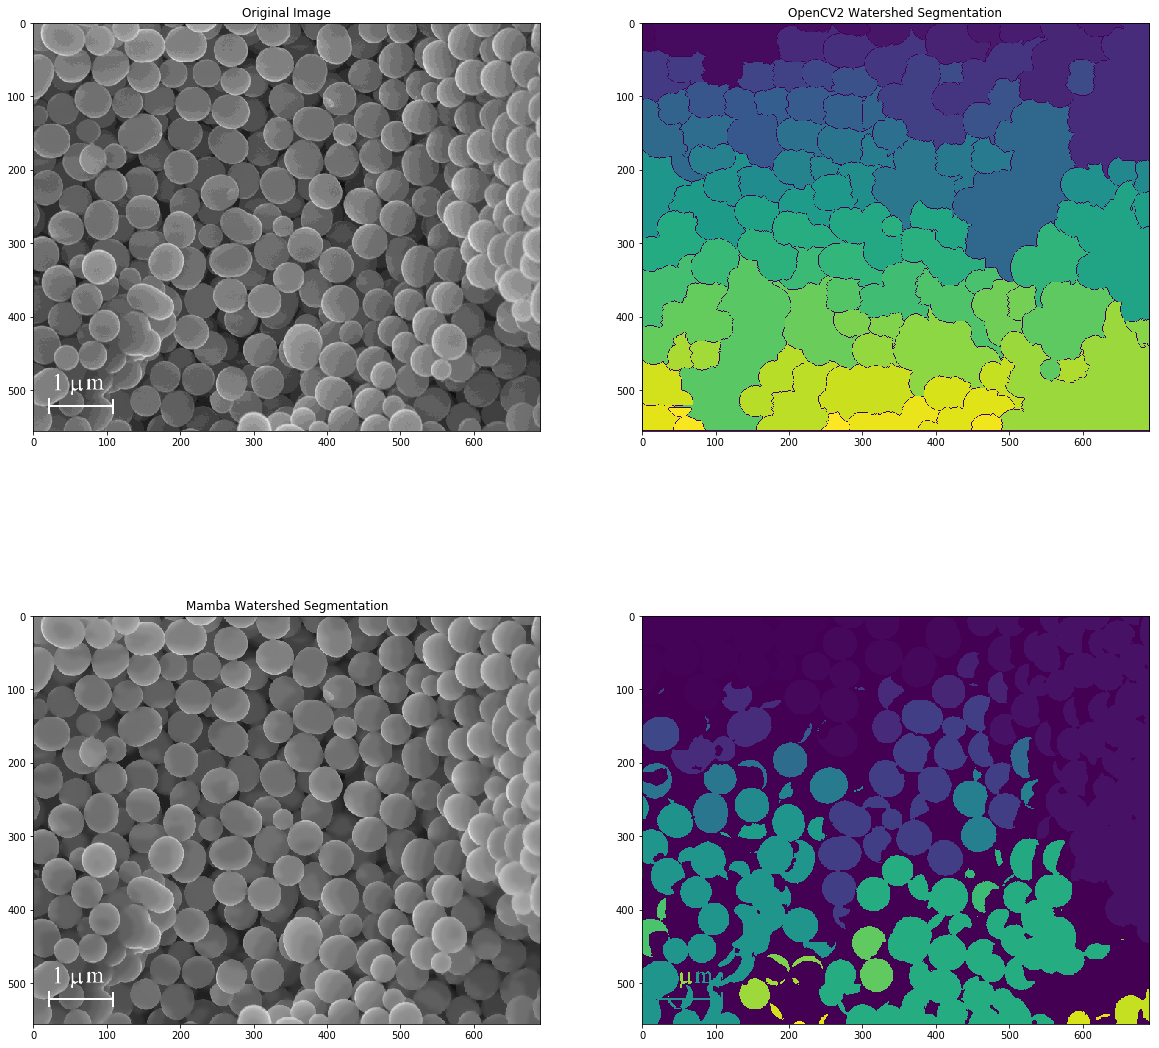

In [28]:
# Image Import of Test Image
img_opal = cv2.imread('Opal_tecopa_near_gem.jpg')
img_opal = np.array(img_opal, dtype=np.uint8)

# Watershed Segmentation of the Image
kernel_wat = np.ones((5,6), np.uint8)
opening_wat = cv2.morphologyEx(img_opal, cv2.MORPH_OPEN, kernel_wat)
canny_wat = cv2.Canny(opening_wat,100,150,3,L2gradient=True)
ret, thresh = cv2.threshold(canny_wat,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel_wat, iterations = 5) #Why do we need this and the other 'opening'?
ret, markers = cv2.connectedComponents(opening)
markers_watershed = cv2.watershed(img_opal,markers)

# SKImage Watershed
#kernal_skwat = zeros(len())
shifted = cv2.pyrMeanShiftFiltering(img_opal, 2, 30)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
markers = ndimage.label(thresh)[0]
labels = watershed(-thresh, markers, mask=thresh)

# Mamba Watershed Segmentation of the Image


# Mamba P Alg Segmentation of the Image


# Image Plotting
fig, ax = plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(img_opal)
ax[0,0].set_title('Original Image')

ax[0,1].imshow(markers_watershed)
ax[0,1].set_title('OpenCV2 Watershed Segmentation')

ax[1,0].imshow(shifted)
ax[1,0].set_title('Mamba Watershed Segmentation')

ax[1,1].imshow(markers)
# ax[1,1].set_title('Mamba P Algorithm Segmentation')

In [27]:
markers.shape

(556, 691)